[View in Colaboratory](https://colab.research.google.com/github/AmoDinho/DeepLearning-Masters/blob/master/NLP_Experiment_I.ipynb)

# NLP on Clothing Reviews

The goal in this notebook is to learn about other NLP techniques and libraries. In this notebook specifically I will be using the NLTK and Sklearn libraries to complete the task

### Resources:

This notebook is 100% recreated from [Ankur Jain's Kaggle kernel](https://www.kaggle.com/ankkur13/prediction-based-on-bayes-algo-nlp-wordcloud).

In [2]:
!pip install textblob
!pip install wordcloud 
!pip install pandas_profiling
!pip install stop_words

    100% |████████████████████████████████| 634kB 6.0MB/s 
    100% |████████████████████████████████| 368kB 6.6MB/s 
  Running setup.py bdist_wheel for stop-words ... - \ done
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [3]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

import string
from textblob import TextBlob

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re

import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_error

In [0]:
import pandas as pd
import numpy as np

Lets import the dataset from Kaggle

In [0]:
df = pd.read_csv("https://storage.googleapis.com/machinelearning_datasets/Womens%20Clothing%20E-Commerce%20Reviews.csv")

In [20]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [24]:
df.info

<bound method DataFrame.info of        Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
5               5         1080   49   
6               6          858   39   
7               7          858   39   
8               8         1077   24   
9               9         1077   34   
10             10         1077   53   
11             11         1095   39   
12             12         1095   53   
13             13          767   44   
14             14         1077   50   
15             15         1065   47   
16             16         1065   34   
17             17          853   41   
18             18         1120   32   
19             19         1077   47   
20             20          847   33   
21             21         1080   55   
22             22         1077   31   
23             23         1077  

In [0]:
df = df.drop('Unnamed: 0', 1)

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Preprocessing

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


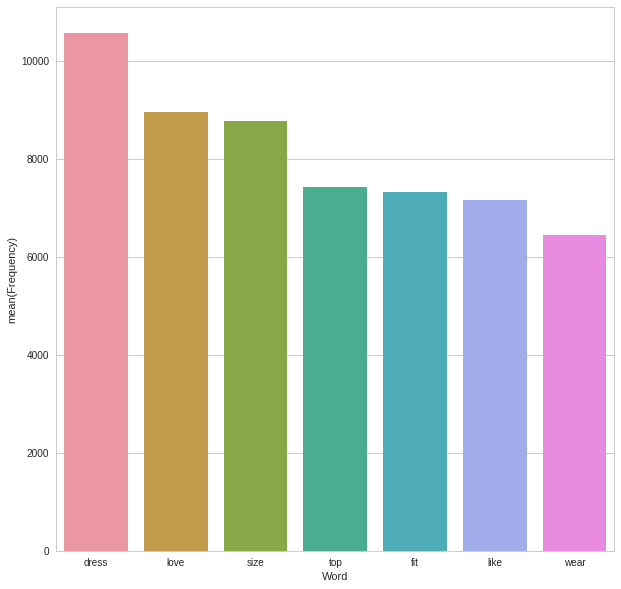

In [16]:
top_N =100

#WE need to convert the list into a text

a = df['Review Text'].str.lower().str.cat(sep=' ')

#remove punctuation, numbers 
b = re.sub('[^A-Za-z]+', ' ', a)

#get rid of the stop words
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
       filtered_sentence.append(w)
        
#get rid of characters with length < 2
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

# calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                   columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt.head(7))



In [0]:
def wc(data,bgcolor,title):
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color=bgcolor, max_words=1000, max_font_size=50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

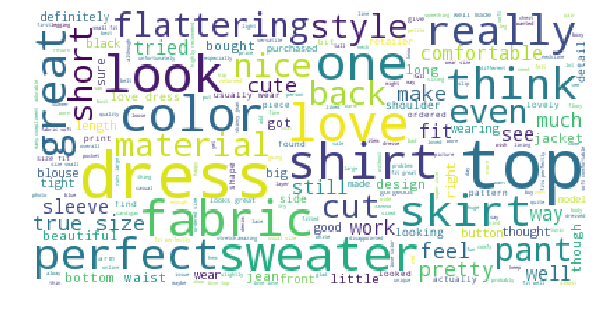

In [20]:
wc(cleaned_data_title, 'white', 'Most Used Words')

In [0]:
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [22]:
df['Review Text'].head(5).apply(text_process)

0    [Absolutely, wonderful, silky, sexy, comfortable]
1    [Love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: Review Text, dtype: object

This is supposed to remove punctuation , stop words and convert them into lowercase.


**Vectorization**

We will use Scikit-learn's `CountVectorizer` to convert text collection into a matrix of token counts.

In [0]:
df = df.dropna(axis=0, how='any')
rating_class = df[(df['Rating'] ==1) | (df['Rating'] == 5)]
X_review=rating_class['Review Text']
y=rating_class['Rating']

In [0]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [27]:
print(len(bow_transformer.vocabulary_))

13952


In [0]:
X_review = bow_transformer.transform(X_review)

**Training and test Data**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3,random_state=101)

Lets train our model with the Naive Bayes ML Algorithim

In [32]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Test the model:



In [0]:
predict=nb.predict(X_test)

We need to evaluate that our model against actual ratings in `y_test` using a confusion matrix.

In [35]:
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[  65  134]
 [  14 3252]]


             precision    recall  f1-score   support

          1       0.82      0.33      0.47       199
          5       0.96      1.00      0.98      3266

avg / total       0.95      0.96      0.95      3465



In [37]:
rating_pos=df['Review Text'][8]
rating_pos

'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'

In [40]:
rating_pos_trans = bow_transformer.transform([rating_pos])
nb.predict(rating_pos_trans)[0]

5

In [47]:
rating_neg=df['Review Text'][10]
rating_neg

'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'

In [48]:
rating_neg_trans = bow_transformer.transform([rating_neg])
nb.predict(rating_neg_trans)[0]

5

In [49]:
rating_neg2=df['Review Text'][61]
rating_neg2

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [50]:
rating_neg_trans2 = bow_transformer.transform([rating_neg2])
nb.predict(rating_neg_trans2)[0]

1

**Lets predict which products are recommended **

In [51]:
X_predict_recommend=df['Review Text']
y_recommend=df['Recommended IND']

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_predict_recommend)

X_predict_recommend = bow_transformer.transform(X_predict_recommend)


X_train, X_test, y_train, y_test = train_test_split(X_predict_recommend, y_recommend, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

predict_recommendation=nb.predict(X_test)

print(confusion_matrix(y_test, predict_recommendation))
print('\n')
print(classification_report(y_test, predict_recommendation))

[[ 588  448]
 [ 248 4615]]


             precision    recall  f1-score   support

          0       0.70      0.57      0.63      1036
          1       0.91      0.95      0.93      4863

avg / total       0.87      0.88      0.88      5899



In [52]:
rating_pos

'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'

In [53]:
rating_pos_trans2 = bow_transformer.transform([rating_pos])
nb.predict(rating_pos_trans2)[0]

1

In [54]:
rating_neg2

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [55]:
rating_neg_trans2 = bow_transformer.transform([rating_neg2])
nb.predict(rating_neg_trans2)[0]

0